In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

base = pd.read_csv('data_cw.csv')

In [2]:
#########################Tratamento dos dados#####################################

#Alterar variáveis categóricas em numéricas
def diagnosis(s):
    if s == 'M':
       return 1
    elif s == 'B':
        return 0
    
    
base['diagnosis'] = base['diagnosis'].apply(diagnosis)

#excluindo
del base['Unnamed: 32']
del base['id']

#criando nova coluna
base['diagnosis2'] = base['diagnosis']
del base['diagnosis']
base.rename(columns={'diagnosis2':'diagnosis'}, inplace = True)


In [3]:
base.columns

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'diagnosis'],
      dtype='object')

In [4]:
base.isnull().sum()

radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
diagnosis                  0
dtype: int64

In [5]:
#correlação:
base.corr()


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
radius_mean,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066,0.730029
texture_mean,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205,0.415185
perimeter_mean,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019,0.742636
area_mean,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738,0.708984
smoothness_mean,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316,0.358560
compactness_mean,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382,0.596534
concavity_mean,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930,0.696360
concave points_mean,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661,0.776614
symmetry_mean,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413,0.330499
fractal_dimension_mean,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297,-0.012838


Text(5, 10.5, 'Matriz de correlação')

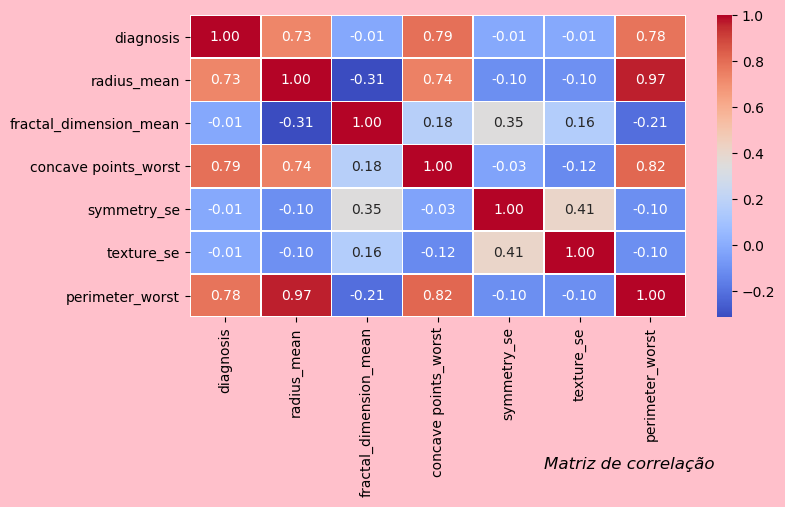

In [6]:
#-----------------------Graficos-----------------------
import seaborn as sns
plt.figure(figsize=(8,4), dpi = 100, facecolor = 'Pink')
matriz_correl = sns.heatmap(base[['diagnosis','radius_mean','fractal_dimension_mean','concave points_worst','symmetry_se','texture_se','perimeter_worst']].corr(), annot = True, fmt='.2f', cmap= 'coolwarm',linewidths=.5)
plt.text(5,10.5, "Matriz de correlação", fontsize = 12, color='Black', fontstyle='italic')


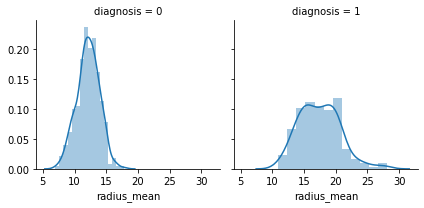

In [7]:
##########FacetGrid#############
graf_age = sns.FacetGrid(base, col='diagnosis')
graf_age = graf_age.map(sns.distplot,'radius_mean')


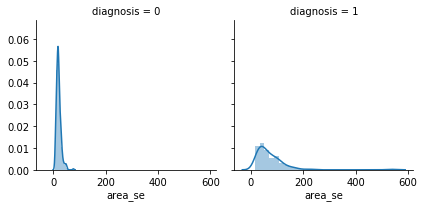

In [8]:
graf_age = sns.FacetGrid(base, col='diagnosis')
graf_age = graf_age.map(sns.distplot,'area_se')

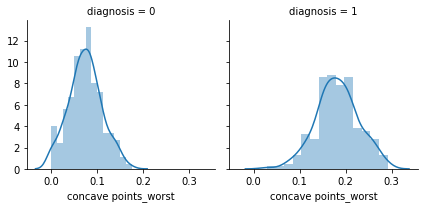

In [9]:
graf_age = sns.FacetGrid(base, col='diagnosis')
graf_age = graf_age.map(sns.distplot,'concave points_worst')

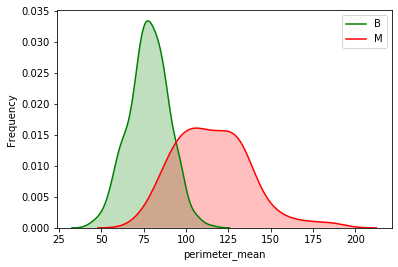

In [10]:
##########Kde plot#############
distribuicao = sns.kdeplot(base['perimeter_mean'][(base['diagnosis']==0 & base['perimeter_mean'].notnull())], color = 'green', shade = True)
distribuicao = sns.kdeplot(base['perimeter_mean'][(base['diagnosis']==1 & base['perimeter_mean'].notnull())], color = 'red', shade = True)
distribuicao.set_xlabel('perimeter_mean')
distribuicao.set_ylabel('Frequency')
distribuicao = distribuicao.legend(['B','M'])

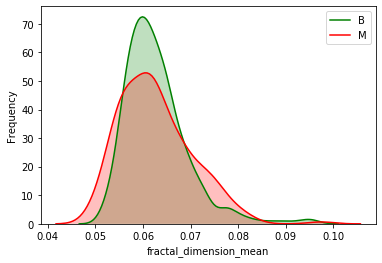

In [11]:
distribuicao = sns.kdeplot(base['fractal_dimension_mean'][(base['diagnosis']==0 & base['fractal_dimension_mean'].notnull())], color = 'green', shade = True)
distribuicao = sns.kdeplot(base['fractal_dimension_mean'][(base['diagnosis']==1 & base['fractal_dimension_mean'].notnull())], color = 'red', shade = True)
distribuicao.set_xlabel('fractal_dimension_mean')
distribuicao.set_ylabel('Frequency')
distribuicao = distribuicao.legend(['B','M'])

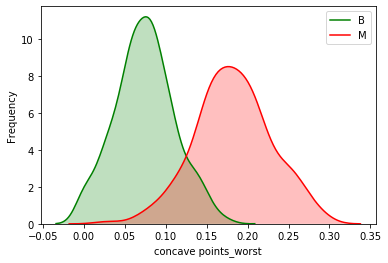

In [12]:
distribuicao = sns.kdeplot(base['concave points_worst'][(base['diagnosis']==0 & base['concave points_worst'].notnull())], color = 'green', shade = True)
distribuicao = sns.kdeplot(base['concave points_worst'][(base['diagnosis']==1 & base['concave points_worst'].notnull())], color = 'red', shade = True)
distribuicao.set_xlabel('concave points_worst')
distribuicao.set_ylabel('Frequency')
distribuicao = distribuicao.legend(['B','M'])


In [13]:
#divisão da base em previsores e classe
previsores = base.iloc[:,0:30].values
classe = base.iloc[:,30].values


#escalonamento- deixar os valores em esclas parecidas -> melhor desempenho
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
previsores = scaler.fit_transform(previsores)

from sklearn.metrics import accuracy_score

#Resultado (REGRESSÂO LOGISTICA)
from sklearn.linear_model import LogisticRegression
#aplicação do algorítmo (RANDOM FOREST)
from sklearn.ensemble import RandomForestClassifier
#importação para (NAIVE BAYES)
from sklearn.naive_bayes import GaussianNB
# importação da bibliotca(KNN)
from sklearn.neighbors import KNeighborsClassifier
# aplicando o algorítimo (ARVORE) 
from sklearn.tree import DecisionTreeClassifier
"""
#Resultado (REDES NEURAIS KERAS)
from  tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
"""
from sklearn.model_selection import StratifiedKFold
kfold = StratifiedKFold(n_splits = 5 , shuffle = True, random_state = 0)
matriz = []

resultados1_REGLOG = []
resultados1_RF = []
resultados1_NB = []
resultados1_KNN = []
resultados1_ARV = []
resultados1_KERAS = []
for indice_treinamento, indice_teste in kfold.split(previsores, np.zeros(shape =(previsores.shape[0],1))):
        #Resultado (REGRESSÂO LOGISTICA)
        classificador_REGLOG = LogisticRegression(random_state=1)
        classificador_REGLOG.fit(previsores[indice_treinamento],classe[indice_treinamento])
        previsoes_REGLOG = classificador_REGLOG.predict(previsores[indice_teste])
        precisao_REGLOG = accuracy_score(classe[indice_teste],previsoes_REGLOG)
        resultados1_REGLOG.append(precisao_REGLOG)
        #Resultado (RANDOM FOREST))
        classificador_RF = RandomForestClassifier(n_estimators = 50, criterion = 'entropy')
        classificador_RF.fit(previsores[indice_treinamento],classe[indice_treinamento])
        previsoes_RF = classificador_RF.predict(previsores[indice_teste])
        precisao_RF = accuracy_score(classe[indice_teste],previsoes_RF)
        resultados1_RF.append(precisao_RF)
        #importação para (NAIVE BAYES)
        classificador_NB =GaussianNB()
        classificador_NB.fit(previsores[indice_treinamento],classe[indice_treinamento])
        previsoes_NB = classificador_NB.predict(previsores[indice_teste])
        precisao_NB = accuracy_score(classe[indice_teste],previsoes_NB)
        resultados1_NB.append(precisao_NB)
        #importação para (KNN)
        classificador_KNN = KNeighborsClassifier(n_neighbors=5,metric='minkowski',  p=2)
        classificador_KNN.fit(previsores[indice_treinamento],classe[indice_treinamento])
        previsoes_KNN = classificador_KNN.predict(previsores[indice_teste])
        precisao_KNN = accuracy_score(classe[indice_teste],previsoes_KNN)
        resultados1_KNN.append(precisao_KNN)
        #importação para (ARVORE) 
        classificador_ARV = DecisionTreeClassifier(criterion = 'entropy', random_state=0)
        classificador_ARV.fit(previsores[indice_treinamento],classe[indice_treinamento])
        previsoes_ARV = classificador_ARV.predict(previsores[indice_teste])
        precisao_ARV= accuracy_score(classe[indice_teste],previsoes_ARV)
        resultados1_ARV.append(precisao_ARV)
        """  
        #importação(REDES NEURAIS KERAS)
        classificador_KERAS = Sequential()
        classificador_KERAS.add(Dense(units = 5, activation = 'relu', input_dim = 9)) #imput_dim -> neurônios na camada de entrada
        classificador_KERAS.add(Dense(units = 5, activation = 'relu', ))
        classificador_KERAS.add(Dense(units = 1, activation = 'sigmoid'))
        classificador_KERAS.compile(optimizer = 'adam', loss ='binary_crossentropy', metrics = ['accuracy'])
        classificador_KERAS.fit(previsores[indice_treinamento],classe[indice_treinamento], batch_size = 10, nb_epoch = 10)
        previsao_KERAS = classificador_KERAS.predict(previsores[indice_teste])
        precisao_KERAS = accuracy_score(classe[indice_teste],previsao_KERAS)
        resultados1_KERAS.append(precisao_KERAS)
        """


In [14]:
resultados1_REGLOG = np.asarray(resultados1_REGLOG)
media_REGLOG = resultados1_REGLOG.mean()
print('Regressão Logistica(array):',resultados1_REGLOG)
print('media_REGLOG',media_REGLOG)


Regressão Logistica(array): [0.99122807 0.99122807 0.98245614 0.98245614 0.98230088]
media_REGLOG 0.9859338612016767


In [15]:

resultados1_RF = np.asarray(resultados1_RF)
media_RF = resultados1_RF.mean()  
print('Random Foreste(Array)',resultados1_RF)
print('media_RF',media_RF)

Random Foreste(Array) [0.96491228 0.97368421 0.93859649 0.95614035 0.97345133]
media_RF 0.9613569321533924


In [16]:
resultados1_NB = np.asarray(resultados1_NB)
media_NB = resultados1_NB.mean()  
print('Naive Bayes(Array):',resultados1_NB)
print('media_NB',media_NB)

Naive Bayes(Array): [0.93859649 0.92105263 0.92982456 0.94736842 0.92035398]
media_NB 0.9314392175128086


In [17]:
resultados1_KNN = np.asarray(resultados1_KNN)
media_KNN = resultados1_KNN.mean() 
print('KNN(Array):',resultados1_KNN) 
print('media_KNN',media_KNN) 

KNN(Array): [0.98245614 0.97368421 0.96491228 0.94736842 0.98230088]
media_KNN 0.9701443875174661


In [18]:
resultados1_ARV = np.asarray(resultados1_ARV)
media_ARV = resultados1_ARV.mean() 
print('Arvore:',resultados1_ARV)
print('media_ARV',media_ARV)


Arvore: [0.93859649 0.89473684 0.94736842 0.93859649 0.9380531 ]
media_ARV 0.9314702685918336


In [ ]:
"""
resultados1_KERAS = np.asarray(resultados1_KERAS)
media_KERAS = resultados1_KERAS.mean() 
"""